# Data Preparation

### Import Libararies & Datasets

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split                      #sc0
import time
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

# Importing datasets
from sklearn.datasets import load_breast_cancer  # Breast cancer dataset
from keras.datasets import cifar10  # CIFAR-10 dataset

### Load Datasets

#### Load Breast Cancer

In [ ]:
breast_cancer = load_breast_cancer()

# Load data to breast_cancer_data                    #sc1
breast_cancer_data = breast_cancer.data

In [ ]:
# The shape of data
breast_cancer_col_num, breast_cancer_row_num = breast_cancer_data.shape

print('Breast cancer dataset has',breast_cancer_col_num,'columns')    #sc2
print('Breast cancer dataset has',breast_cancer_row_num,'rows')

Breast cancer dataset has 569 columns
Breast cancer dataset has 30 rows


In [ ]:
# Breast cancer lables
breast_cancer_labels = breast_cancer.target

# The labels shape
print(breast_cancer_labels.shape)
  #sc3
# Reshape data
final_breast_cancer_labels = np.reshape(breast_cancer_labels,(569,1))

(569,)


In [ ]:
# The shape of dataset after concatenate features with label
final_breast_cancer_data = np.concatenate([breast_cancer_data,final_breast_cancer_labels],axis=1)

# The shape of data after concatenate features with label
final_breast_cancer_col_num, final_breast_cancer_row_num = final_breast_cancer_data.shape

print('Breast cancer dataset after concatenate features and label has',final_breast_cancer_col_num,'columns')
print('Breast cancer dataset after concatenate features and label has',final_breast_cancer_row_num,'rows')

Breast cancer dataset after concatenate features and label has 569 columns
Breast cancer dataset after concatenate features and label has 31 rows


In [ ]:
# Create the breast cancer dataframe
breast_cancer_dataset = pd.DataFrame(final_breast_cancer_data)          #sc4

In [ ]:
# Features
features = breast_cancer.feature_names

# Print features names      #sc5
for f in features:
  print(f)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension


In [ ]:
# Append 'label' column to features
features_labels = np.append(features,'label')

In [ ]:
# Replace the breast_cancer_dataset coulmns with new columns features_labels
breast_cancer_dataset.columns = features_labels

In [ ]:
# Print the firt 10 rows of the breast cancer dataset
breast_cancer_dataset.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [ ]:
# Change the label numbers to Benign, Malignant
breast_cancer_dataset['label'].replace(0, 'Benign',inplace=True)
breast_cancer_dataset['label'].replace(1, 'Malignant',inplace=True)

In [ ]:
# Print the last 10 rows of the dataset after modification
breast_cancer_dataset.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,Malignant
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,Malignant
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,Malignant
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,Benign
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,Benign
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,Malignant


In [ ]:
# Scale breast cnacer features
from sklearn.preprocessing import StandardScaler           #scsc

x = breast_cancer_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

# print the shape of x
print(x.shape)

(569, 30)


In [ ]:
# Convert the normalized features into a tabular format with the help of DataFrame

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

# Creating a DataFrame called normalised_breast_cancer
normalised_breast_cancer = pd.DataFrame(x,columns=feat_cols)

# Print the last 10 rows of normalised_breast_cancer DataFrame
normalised_breast_cancer.tail(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
559,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,-1.546608,0.411444,...,-0.784675,1.869899,-0.744086,-0.714386,-0.112597,-0.016317,0.435670,-0.275239,-1.276034,0.186983
560,-0.021952,1.829157,-0.024262,-0.154973,0.208495,0.156521,-0.554670,-0.151647,-1.002617,-0.154180,...,-0.200702,1.220152,-0.210324,-0.305671,-0.362461,-0.177261,-0.669679,-0.149315,-1.052780,-0.040776
561,-0.831392,2.345765,-0.877311,-0.764748,-1.556408,-1.303122,-1.114873,-1.261820,-2.744117,-1.102557,...,-0.900641,2.055541,-0.955268,-0.775210,-1.740223,-1.267986,-1.305831,-1.745063,-2.159342,-1.379622
562,0.310345,2.636649,0.470844,0.176365,0.600616,1.977758,2.086645,1.170295,1.155090,1.236490,...,0.259021,2.786709,0.638572,0.060502,0.409050,3.418837,4.307272,1.842324,1.922319,3.156163
563,1.929226,1.349781,2.101976,1.968434,0.963560,2.260135,2.870075,2.540213,1.231760,0.849484,...,1.660970,0.607860,2.139779,1.649655,0.365215,1.045400,1.860055,2.125538,0.045693,0.819278
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [ ]:
# Split breast cancer dataset into train and test sets       #scsc
x_train, x_test, y_train, y_test = train_test_split(normalised_breast_cancer, breast_cancer_dataset['label'], test_size=0.2, random_state=1)

#### Load CIFAR-10 dataset

In [ ]:
# Intialize the x_train, y_train, x_test, and y_test sets                  #SCSC
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

In [ ]:
# Print the shape of cifare10 dataset
print('The CIFAR10 x train shape', cifar10_x_train.shape)
print('The CIFAR10 y train shape', cifar10_y_train.shape)            #SCSC
print('The CIFAR10 x test shape', cifar10_x_test.shape)
print('The CIFAR10 y test shape', cifar10_y_test.shape)

The CIFAR10 x train shape (50000, 32, 32, 3)
The CIFAR10 y train shape (50000, 1)
The CIFAR10 x test shape (10000, 32, 32, 3)
The CIFAR10 y test shape (10000, 1)


In [ ]:
# Getting the number of classes in the CIFAR10 dataset
cifar10_classes = np.unique(cifar10_y_train)                      #SCSC
print('The number of classes:', len(cifar10_classes))
print('Classes:',cifar10_classes)

The number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating dictionary contains class names with their corresponding categorical class labels.
cifar10_label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',                                                     #SCSC
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

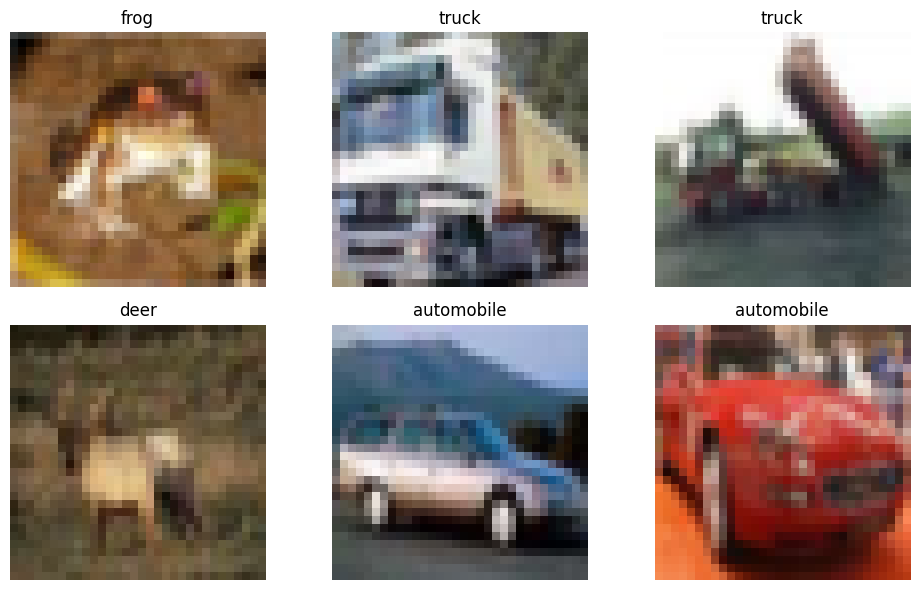

In [ ]:
# Display some images from CIFAR-10
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(cifar10_x_train[i])                          #SCSC
    ax.axis('off')
    ax.set_title(cifar10_label_dict[cifar10_y_train[i][0]])
plt.tight_layout()
plt.show()

In [ ]:
# Normalize the pixel values of cifar10_x_train by dividing by 255.0
cifar10_x_train = cifar10_x_train / 255.0

In [ ]:
# Flatten the cifar10_x_train images into a 2D array
cifar10_x_train_flat = cifar10_x_train.reshape(-1, 3072)

In [ ]:
# Create column names for the DataFrame based on pixel indices
feat_cols = ['pixel' + str(i) for i in range(cifar10_x_train_flat.shape[1])]

In [ ]:
# Create a DataFrame 'df_cifar' from the flattened cifar10_x_train data with column names 'feat_cols'
df_cifar = pd.DataFrame(cifar10_x_train_flat, columns=feat_cols)

In [ ]:
# Add a 'label' column to df_cifar containing the corresponding cifar10_y_train labels
df_cifar['label'] = cifar10_y_train

In [ ]:
# Print the size (shape) of the DataFrame 'df_cifar'
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [ ]:
# Display the first 10 rows of the DataFrame 'df_cifar'
df_cifar.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1
5,0.623529,0.400000,0.396078,0.588235,0.356863,0.372549,0.600000,0.372549,0.380392,0.603922,...,0.650980,0.184314,0.054902,0.678431,0.200000,0.066667,0.713725,0.223529,0.074510,1
6,0.643137,0.807843,0.329412,0.411765,0.549020,0.239216,0.462745,0.580392,0.396078,0.505882,...,0.368627,0.525490,0.113725,0.356863,0.521569,0.101961,0.478431,0.666667,0.172549,2
7,0.109804,0.137255,0.152941,0.117647,0.133333,0.172549,0.129412,0.172549,0.184314,0.243137,...,0.415686,0.564706,0.392157,0.407843,0.556863,0.388235,0.396078,0.549020,0.376471,7
8,0.525490,0.729412,0.874510,0.513725,0.721569,0.862745,0.501961,0.713725,0.854902,0.521569,...,0.121569,0.368627,0.533333,0.125490,0.368627,0.537255,0.125490,0.368627,0.541176,8
9,0.490196,0.490196,0.454902,0.431373,0.396078,0.356863,0.400000,0.352941,0.325490,0.415686,...,0.560784,0.458824,0.321569,0.560784,0.454902,0.329412,0.564706,0.454902,0.337255,3


# Part 1

### Task 1

#### Breast Cancer Data Visualization

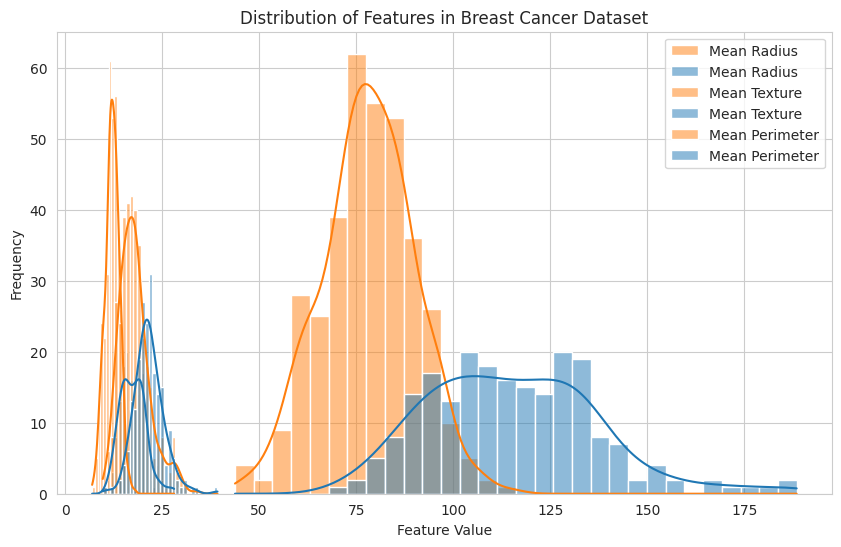

In [ ]:
# Set the style and size of plots
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))    #scsc

# Plot histograms for selected features
sns.histplot(data=breast_cancer_dataset, x='mean radius', hue='label', kde=True, alpha=0.5, bins=30, label='Mean Radius')
sns.histplot(data=breast_cancer_dataset, x='mean texture', hue='label', kde=True, alpha=0.5, bins=30, label='Mean Texture')
sns.histplot(data=breast_cancer_dataset, x='mean perimeter', hue='label', kde=True, alpha=0.5, bins=30, label='Mean Perimeter')

# Set plot labels and title
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Distribution of Features in Breast Cancer Dataset')
plt.legend()
plt.show()


#### CIFAR-10 Data Visualization

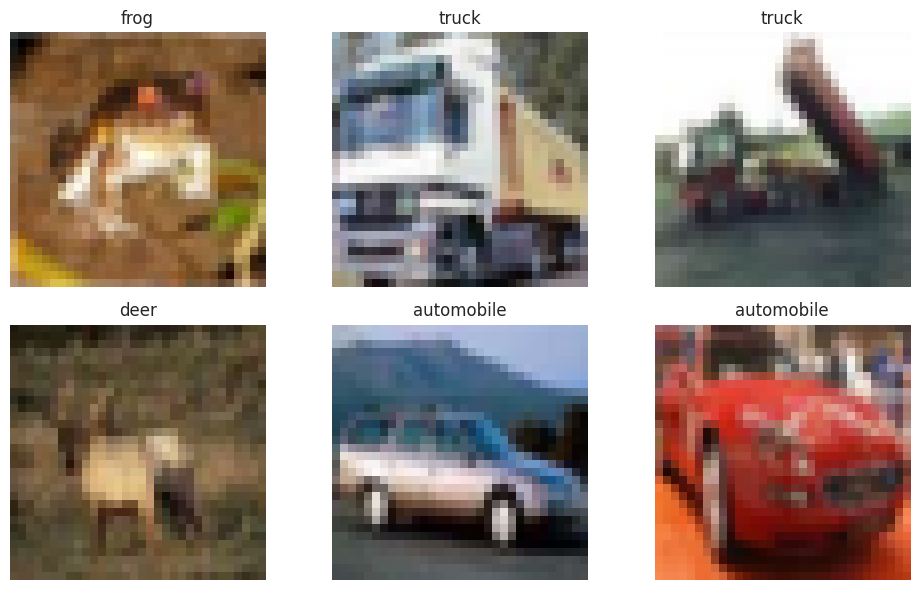

In [ ]:
# Display some images from CIFAR-10 x train
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(cifar10_x_train[i])     #scsc
    ax.axis('off')
    ax.set_title(cifar10_label_dict[cifar10_y_train[i][0]])
plt.tight_layout()
plt.show()

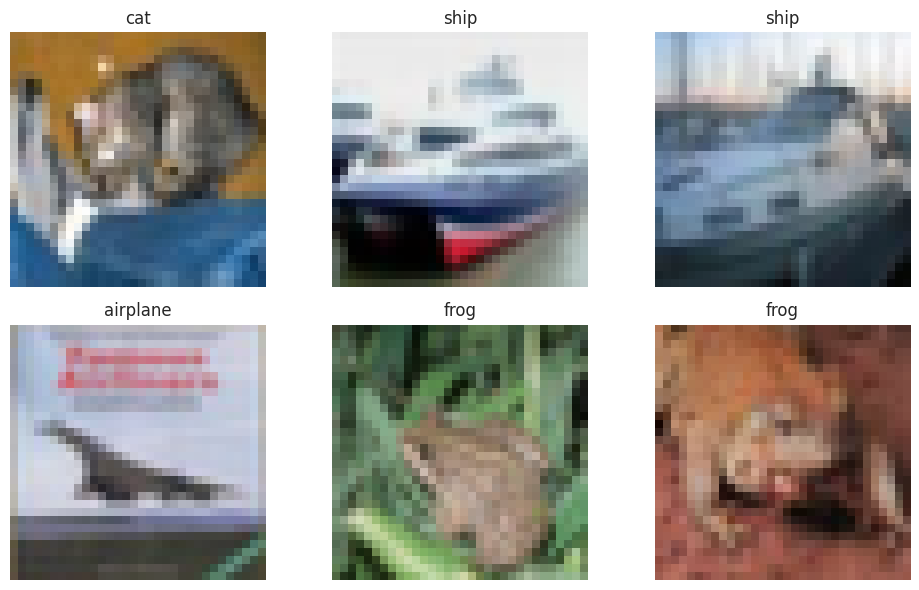

In [ ]:
# Display some images from CIFAR-10 x test
fig, axes = plt.subplots(2, 3, figsize=(10, 6))    #scsc
for i, ax in enumerate(axes.flat):
    ax.imshow(cifar10_x_test[i])
    ax.axis('off')
    ax.set_title(cifar10_label_dict[cifar10_y_test[i][0]])
plt.tight_layout()
plt.show()

### Task 2

#### ML Algorithm For Breast Cancer

In [ ]:
from sklearn.linear_model import LogisticRegression    #scsc

# Create a logistic regression model
model = LogisticRegression()

# Start recording the time before training
start_time = time.time()

# Fit the model to the training data
model.fit(x_train, y_train)

# Calculate the training time
training_time = time.time() - start_time

# Evaluate the model on the test data
score = model.score(x_test, y_test)

print(f"Brest cancer model training time: {training_time:.2f} seconds")
print("The accuracy of the model is:", score)

Brest cancer model training time: 0.08 seconds
The accuracy of the model is: 0.9736842105263158


#### CIFAR-10 Algorithm

In [ ]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential                 #scsc
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Create a sequential model
model = Sequential()                    #scsc

In [ ]:
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))              #scsc
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

In [ ]:
# Add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))          #scsc
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])      #scsc

In [ ]:
# Start recording the time before training
start_time = time.time()
                                                             # scsc
# Train the model
model.fit(cifar10_x_train, cifar10_y_train, epochs=5, batch_size=64, validation_data=(cifar10_x_test, cifar10_y_test))

# Calculate the training time
training_time = time.time() - start_time

Epoch 1/5
782/782 [==============================] - 84s 106ms/step - loss: 1.6666 - accuracy: 0.3870 - val_loss: 166.3283 - val_accuracy: 0.4023
Epoch 2/5
782/782 [==============================] - 75s 95ms/step - loss: 1.3322 - accuracy: 0.5248 - val_loss: 217.7148 - val_accuracy: 0.4012
Epoch 3/5
782/782 [==============================] - 76s 97ms/step - loss: 1.1744 - accuracy: 0.5857 - val_loss: 250.5486 - val_accuracy: 0.4013
Epoch 4/5
782/782 [==============================] - 75s 96ms/step - loss: 1.0575 - accuracy: 0.6303 - val_loss: 235.2311 - val_accuracy: 0.4171
Epoch 5/5
782/782 [==============================] - 76s 97ms/step - loss: 0.9698 - accuracy: 0.6642 - val_loss: 174.5882 - val_accuracy: 0.4869


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"Brest cancer model training time: {training_time:.2f} mins")

Brest cancer model training time: 7.51 mins


# Part 2

### Task 1

#### Breast Cancer

##### Case 1: Number of components will be set to 2

In [ ]:
# Initialize PCA with 2 components
pca_breast_comp_2 = PCA(n_components=2)

# Fit and transform the original data 'x' using PCA with 2 components
# This reduces the dimensions of the data to 2 principal components
pca_breast_2_comp = pca_breast_comp_2.fit(x)

# Transform the data into a NumPy array
pca_breast_2_comp_transform = pca_breast_2_comp.transform(x)

In [ ]:
# Create a DataFrame from the PCA-transformed data 'pca_breast_2_comp'
pca_breast_Df_2_comp = pd.DataFrame(data=pca_breast_2_comp_transform, columns=['pca 1', 'pca 2'])

In [ ]:
# Display the first 10 rows of the new pca_breast_DF
pca_breast_Df_2_comp.head(10)

,pca 1,pca 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
5,2.380247,3.949929
6,2.238883,-2.690031
7,2.143299,2.340244
8,3.174924,3.391813
9,6.351747,7.727174


##### Case 2: Number of components will be set to 3

In [ ]:
# Initialize PCA with 3 components
pca_breast_comp_3 = PCA(n_components=3)

# Fit and transform the original data 'x' using PCA with 3 components
# This reduces the dimensions of the data to 3 principal components
pca_breast_3_comp = pca_breast_comp_3.fit(x)

# Transform the data into a NumPy array
pca_breast_3_comp_transform = pca_breast_3_comp.transform(x)

In [ ]:
# Create a DataFrame from the PCA-transformed data 'pca_breast_3_comp'
pca_breast_Df_3_comp = pd.DataFrame(data=pca_breast_3_comp_transform, columns=['pca 1', 'pca 2', 'pca 3'])

In [ ]:
# Display the first 10 rows of the new pca_breast_DF
pca_breast_Df_3_comp.head(10)

,pca 1,pca 2,pca 3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389766
5,2.380247,3.949929,-2.934877
6,2.238883,-2.690031,-1.639913
7,2.143299,2.340244,-0.871947
8,3.174924,3.391813,-3.119986
9,6.351747,7.727174,-4.341916


##### Case 3: Number of components will be set to 4

In [ ]:
# Initialize PCA with 4 components
pca_breast_comp_4 = PCA(n_components=4)

# Fit and transform the original data 'x' using PCA with 4 components
# This reduces the dimensions of the data to 4 principal components
pca_breast_4_comp = pca_breast_comp_4.fit(x)

# Transform the data into a NumPy array
pca_breast_4_comp_transform = pca_breast_4_comp.transform(x)

In [ ]:
# Create a DataFrame from the PCA-transformed data 'pca_breast_4_comp_transform'
pca_breast_Df_4_comp = pd.DataFrame(data=pca_breast_4_comp_transform, columns=['pca 1', 'pca 2', 'pca 3', 'pca 4'])

In [ ]:
# Display the first 10 rows of the new pca_breast_DF
pca_breast_Df_4_comp.head(10)

,pca 1,pca 2,pca 3,pca 4
0,9.192837,1.948583,-1.123166,3.633731
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912083
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389767,2.940639
5,2.380247,3.949929,-2.934877,0.941037
6,2.238883,-2.690031,-1.639913,0.149340
7,2.143299,2.340244,-0.871947,-0.127043
8,3.174924,3.391813,-3.119986,-0.601297
9,6.351747,7.727174,-4.341916,-3.375201


##### Case 4: Number of components will be set to 5

In [ ]:
# Initialize PCA with 5 components
pca_breast_comp_5 = PCA(n_components=5)

# Fit and transform the original data 'x' using PCA with 5 components
# This reduces the dimensions of the data to 5 principal components
pca_breast_5_comp = pca_breast_comp_5.fit(x)

# Transform the data into a NumPy array
pca_breast_5_comp_transform = pca_breast_5_comp.transform(x)

In [ ]:
# Create a DataFrame from the PCA-transformed data 'pca_breast_5_comp_transform'
pca_breast_Df_5_comp = pd.DataFrame(data=pca_breast_5_comp_transform, columns=['pca 1', 'pca 2', 'pca 3', 'pca 4','pca 5'])

In [ ]:
# Display the first 10 rows of the new pca_breast_DF
pca_breast_Df_5_comp.head(10)

,pca 1,pca 2,pca 3,pca 4,pca 5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,3.935302,-1.948072,1.389767,2.940639,0.546747
5,2.380247,3.949929,-2.934877,0.941037,-1.056042
6,2.238883,-2.690031,-1.639913,0.149340,0.040359
7,2.143299,2.340244,-0.871947,-0.127043,-1.427437
8,3.174924,3.391813,-3.119986,-0.601297,-1.522290
9,6.351747,7.727174,-4.341916,-3.375202,1.710263


#### CAFIR-10

##### Case 1: Number of components will be set to 2

In [ ]:
# Initialize PCA with 2 components
pca_cifar_2_comp = PCA(n_components=2)

In [ ]:
# Fit and transform the features (excluding the 'label' column) of df_cifar using PCA with 2 components
# This reduces the dimensions of the data to 2 principal components
pca_cifar_2_com = pca_cifar_2_comp.fit(df_cifar.iloc[:, :-1])

# Transform the data into a NumPy array
principalComponents_cifar_2 = pca_cifar_2_com.transform(df_cifar.iloc[:, :-1])

In [ ]:
pca_cifar_Df_2_comp = pd.DataFrame(data = principalComponents_cifar_2
             , columns = ['pca 1', 'pca 2'])
pca_cifar_Df_2_comp['y'] = y_train

In [ ]:
# Display the first 10 rows of the DataFrame pca_breast_Df_2_comp
pca_cifar_Df_2_comp.head(10)

##### Case 2: Number of components will be set to 3

In [ ]:
# Initialize PCA with 3 components0
pca_cifar_3_comp = PCA(n_components=3)

In [ ]:
# Fit and transform the features (excluding the 'label' column) of df_cifar using PCA with 3 components
# This reduces the dimensions of the data to 3 principal components
pca_cifar_3_com = pca_cifar_3_comp.fit(df_cifar.iloc[:, :-1])

# Transform the data into a NumPy array
pca_cifar_Df_3_comp = pca_cifar_3_com.transform(df_cifar.iloc[:, :-1])

In [ ]:
pca_cifar_Df_3_comp = pd.DataFrame(data = pca_cifar_Df_3_comp
             , columns = ['pca 1', 'pca 2','pca3'])
pca_cifar_Df_3_comp['y'] = y_train

In [ ]:
# Display the first 10 rows of the DataFrame pca_breast_Df_3_comp
pca_cifar_Df_3_comp.head(10)

##### Case 3: Number of components will be set to 4

In [ ]:
# Initialize PCA with 4 components
pca_cifar_4_comp = PCA(n_components=4)

In [ ]:
# Fit and transform the features (excluding the 'label' column) of df_cifar using PCA with 4 components
# This reduces the dimensions of the data to 4 principal components
pca_cifar_4_com = pca_cifar_4_comp.fit(df_cifar.iloc[:, :-1])

# Transform the data into a NumPy array
principalComponents_cifar_4 = pca_cifar_4_com.transform(df_cifar.iloc[:, :-1])

In [ ]:
pca_cifar_Df_4_comp = pd.DataFrame(data = principalComponents_cifar_4
             , columns = ['pca 1', 'pca 2','pca3','pca4'])
pca_cifar_Df_4_comp['y'] = y_train

In [ ]:
# Display the first 10 rows of the DataFrame pca_breast_Df_4_comp
pca_cifar_Df_4_comp.head(10)

##### Case 4: Number of components will be set to 5

In [ ]:
# Initialize PCA with 5 components
pca_cifar_5_comp = PCA(n_components=5)

In [ ]:
# Case 4: Number of components
pca_cifar_5_comp = PCA(n_components=5)
# Fit and transform the features with 5 components
pca_cifar_5_com = pca_cifar_5_comp.fit(df_cifar.iloc[:, :-1])

# Transform the data into a NumPy array
principalComponents_cifar_5 = pca_cifar_5_com.transform(df_cifar.iloc[:, :-1])

In [ ]:
pca_cifar_Df_5_comp = pd.DataFrame(data = principalComponents_cifar_5
             , columns = ['pca 1', 'pca 2','pca3','pca4','pca5'])
pca_cifar_Df_5_comp['y'] = y_train

In [ ]:
# Display the first 10 rows of the DataFrame pca_breast_Df_5_comp
pca_cifar_Df_5_comp.head(10)

### Task 2

#### Breast Cancer

##### Case 1

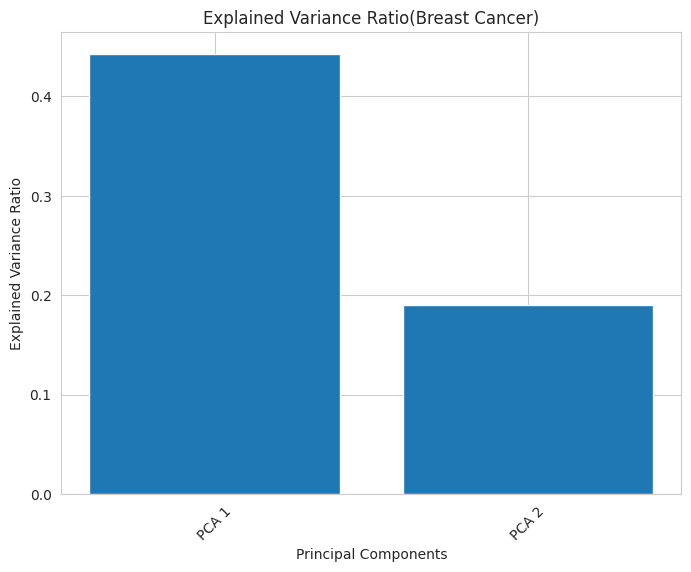

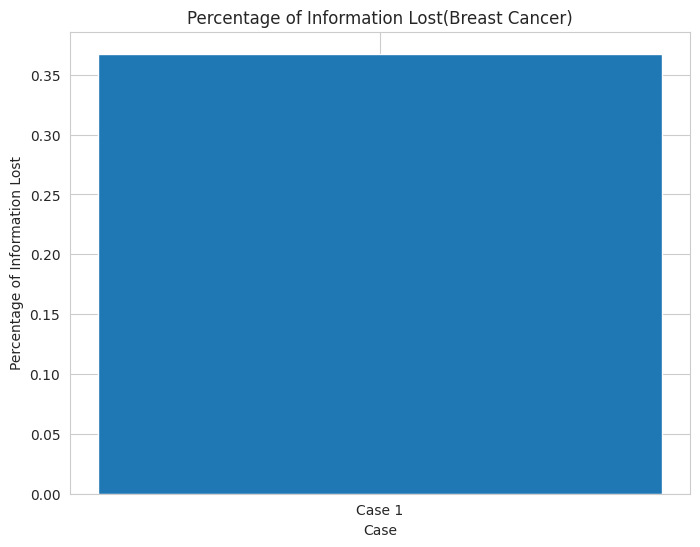

In [ ]:
explained_variance_ratio_breast_cancer_case1 = pca_breast_2_comp.explained_variance_ratio_

# Calculate percentage of information lost for Case 1
info_lost_percentage_breast_cancer_case1 = 1 - np.sum(explained_variance_ratio_breast_cancer_case1)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2'], explained_variance_ratio_breast_cancer_case1)
plt.title('Explained Variance Ratio(Breast Cancer)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_breast_cancer_case1)
plt.title('Percentage of Information Lost(Breast Cancer)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()

In [ ]:
print('Explained variation per principal component for breast cancer 2 components: {}'.format(explained_variance_ratio_breast_cancer_case1))

Explained variation per principal component for breast cancer 2 components: [0.44272026 0.18971182]


##### Case 2

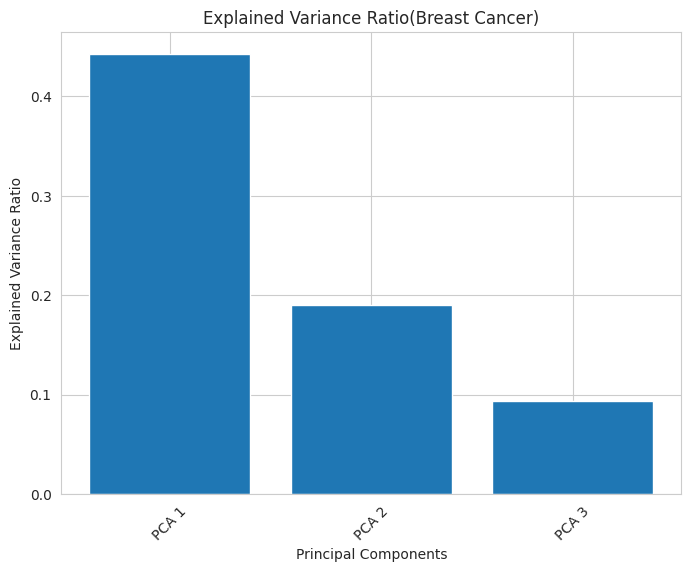

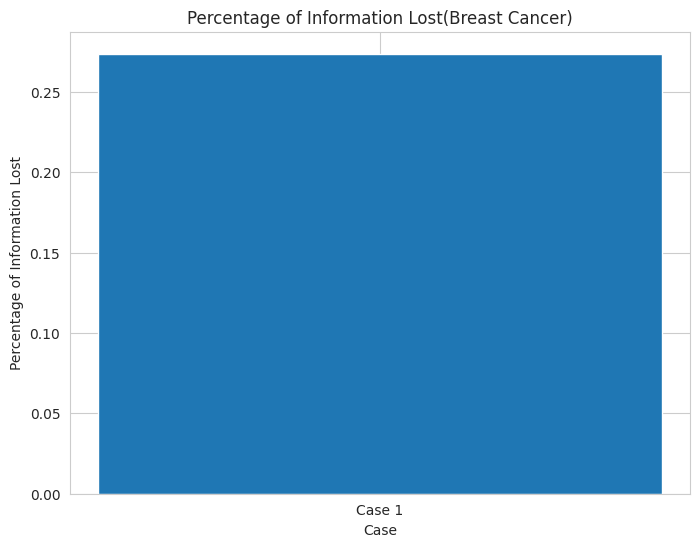

In [ ]:
explained_variance_ratio_breast_cancer_case2 = pca_breast_3_comp.explained_variance_ratio_

# Calculate percentage of information lost for Case 2
info_lost_percentage_breast_cancer_case2 = 1 - np.sum(explained_variance_ratio_breast_cancer_case2)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3'], explained_variance_ratio_breast_cancer_case2)
plt.title('Explained Variance Ratio(Breast Cancer)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_breast_cancer_case2)
plt.title('Percentage of Information Lost(Breast Cancer)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()

In [ ]:
print('Explained variation per principal component for breast cancer 3 components: {}'.format(explained_variance_ratio_breast_cancer_case2))

Explained variation per principal component for breast cancer 3 components: [0.44272026 0.18971182 0.09393163]


##### Case 3

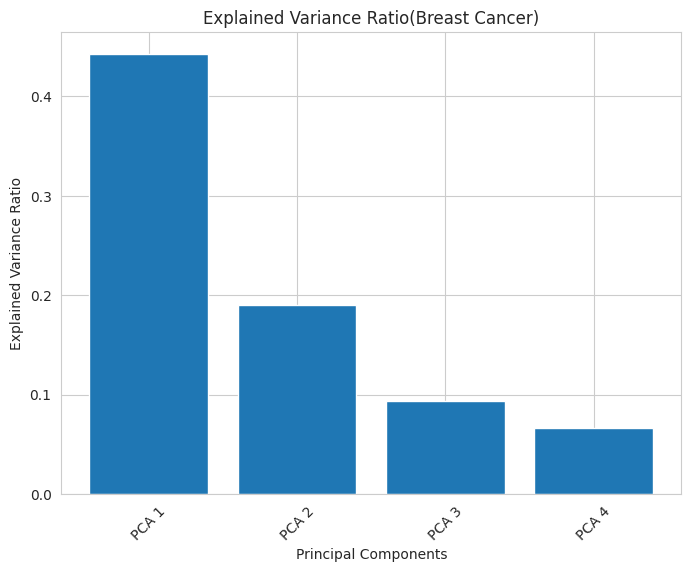

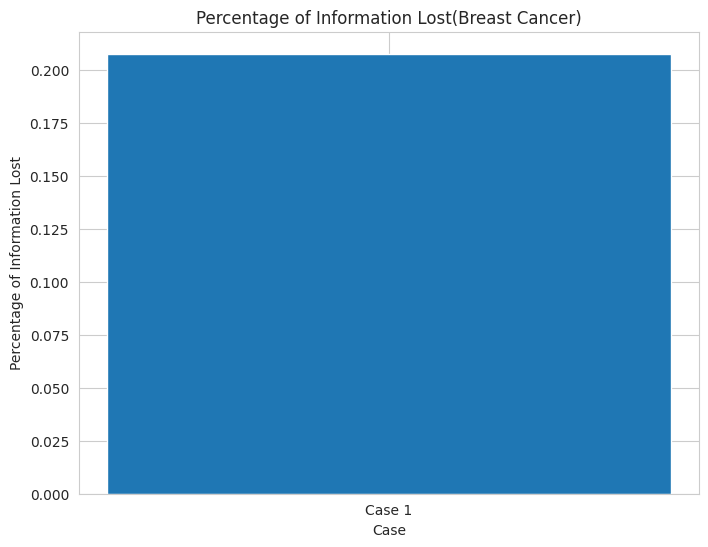

In [ ]:
explained_variance_ratio_breast_cancer_case3 = pca_breast_4_comp.explained_variance_ratio_

# Calculate percentage of information lost for Case 3
info_lost_percentage_breast_cancer_case3 = 1 - np.sum(explained_variance_ratio_breast_cancer_case3)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3','PCA 4'], explained_variance_ratio_breast_cancer_case3)
plt.title('Explained Variance Ratio(Breast Cancer)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_breast_cancer_case3)
plt.title('Percentage of Information Lost(Breast Cancer)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()

In [ ]:
print('Explained variation per principal component for breast cancer 4 components: {}'.format(explained_variance_ratio_breast_cancer_case3))

Explained variation per principal component for breast cancer 4 components: [0.44272026 0.18971182 0.09393163 0.06602135]


##### Case 4

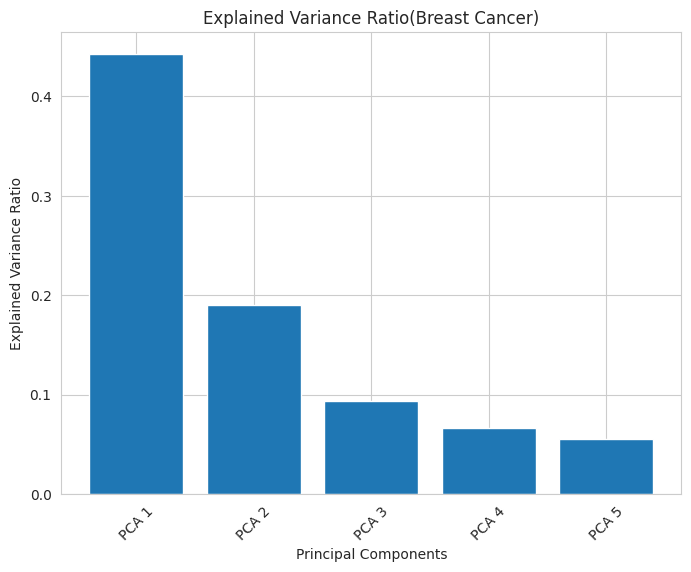

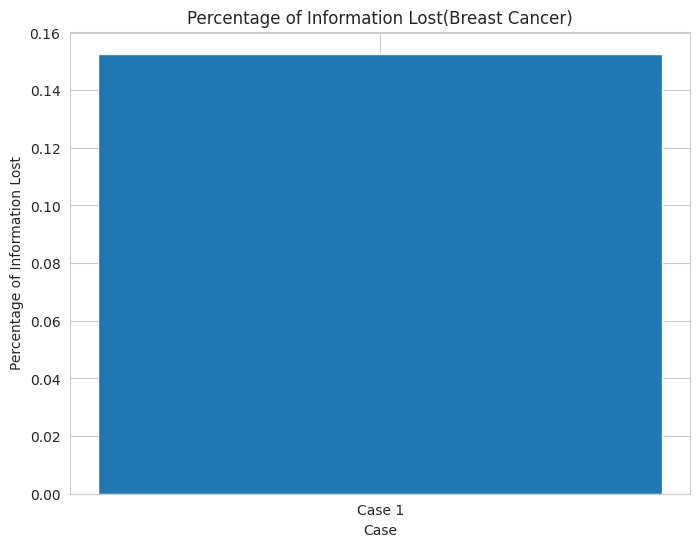

In [ ]:
explained_variance_ratio_breast_cancer_case4 = pca_breast_5_comp.explained_variance_ratio_

# Calculate percentage of information lost for Case 4
info_lost_percentage_breast_cancer_case4 = 1 - np.sum(explained_variance_ratio_breast_cancer_case4)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3','PCA 4','PCA 5'], explained_variance_ratio_breast_cancer_case4)
plt.title('Explained Variance Ratio(Breast Cancer)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_breast_cancer_case4)
plt.title('Percentage of Information Lost(Breast Cancer)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()

In [ ]:
print('Explained variation per principal component for breast cancer 5 components: {}'.format(explained_variance_ratio_breast_cancer_case4))

Explained variation per principal component for breast cancer 5 components: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


#### CAFIR-10

##### Case 1

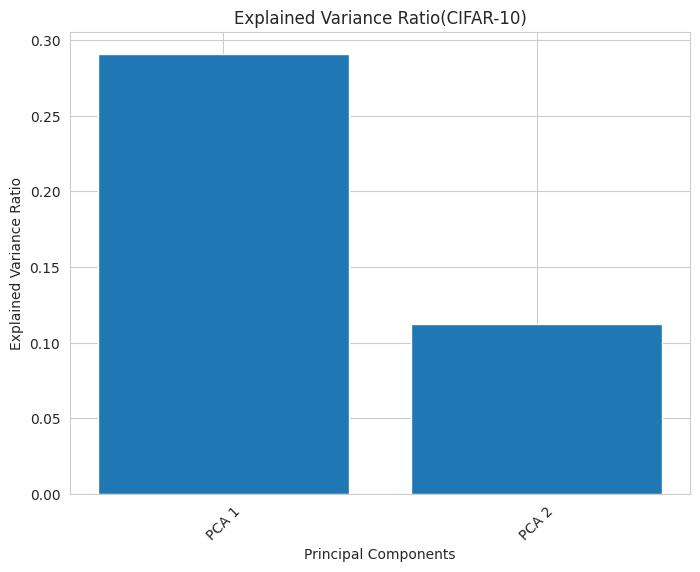

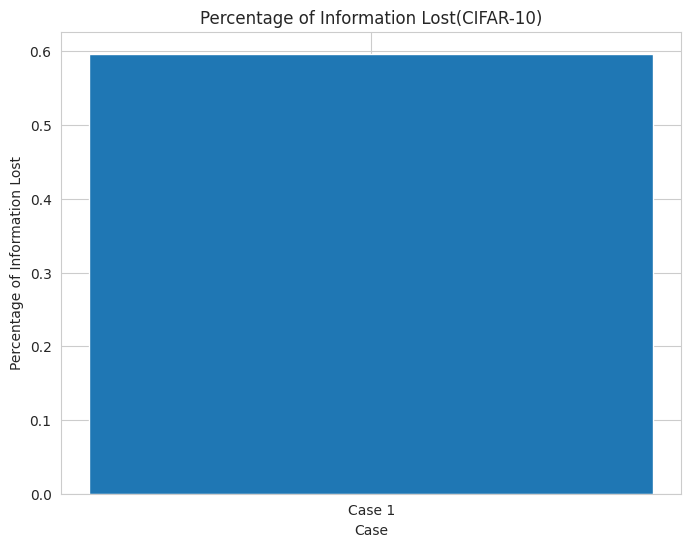

In [ ]:
explained_variance_ratio_cifar10_case1 = pca_cifar_2_com.explained_variance_ratio_

# Calculate percentage of information lost for Case 1
info_lost_percentage_cifar10_case1 = 1 - np.sum(explained_variance_ratio_cifar10_case1)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2'], explained_variance_ratio_cifar10_case1)
plt.title('Explained Variance Ratio(CIFAR-10)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_cifar10_case1)
plt.title('Percentage of Information Lost(CIFAR-10)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()


In [ ]:
print('Explained variation per principal component for CIFAR 4 components: {}'.format(explained_variance_ratio_cifar10_case1))

Explained variation per principal component for CIFAR 4 components: [0.2907663  0.11253144]


##### Case 2

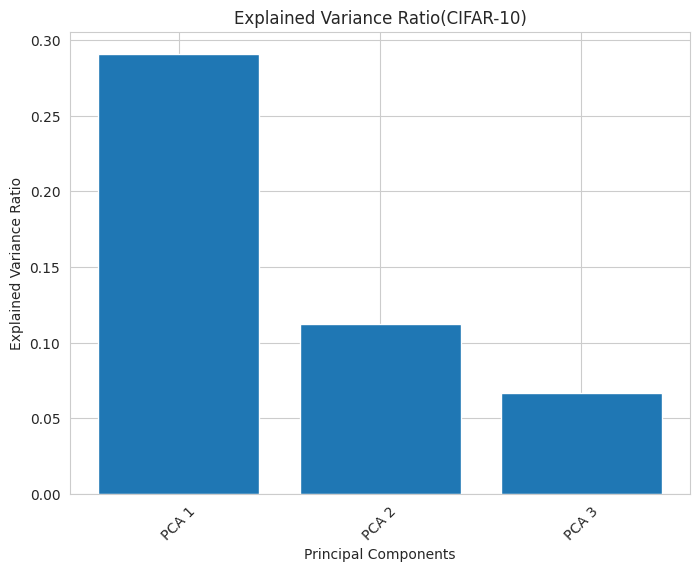

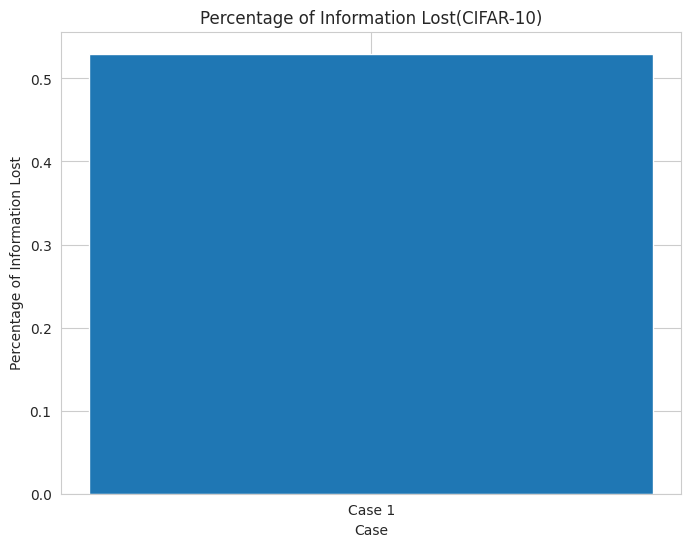

In [ ]:
explained_variance_ratio_cifar10_case2 = pca_cifar_3_com.explained_variance_ratio_

# Calculate percentage of information lost for Case 1
info_lost_percentage_cifar10_case2 = 1 - np.sum(explained_variance_ratio_cifar10_case2)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3'], explained_variance_ratio_cifar10_case2)
plt.title('Explained Variance Ratio(CIFAR-10)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_cifar10_case2)
plt.title('Percentage of Information Lost(CIFAR-10)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()


In [ ]:
print('Explained variation per principal component for CIFAR 3 components: {}'.format(explained_variance_ratio_cifar10_case2))

Explained variation per principal component for CIFAR 3 components: [0.2907663  0.11253144 0.06694414]


##### Case 3

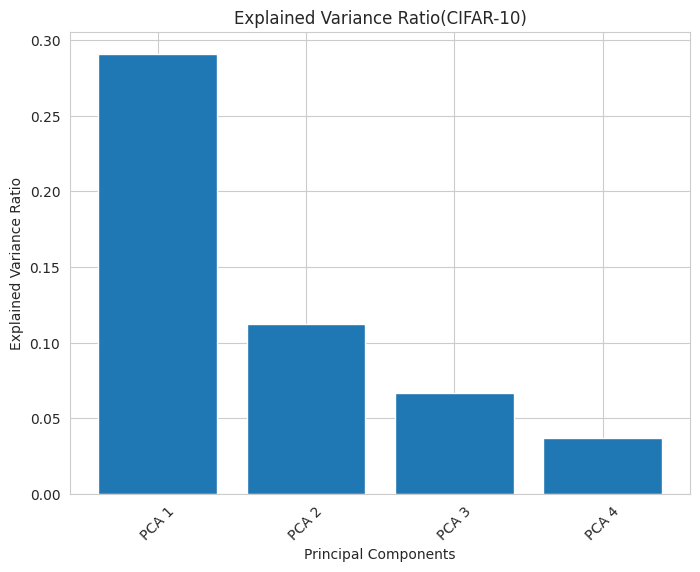

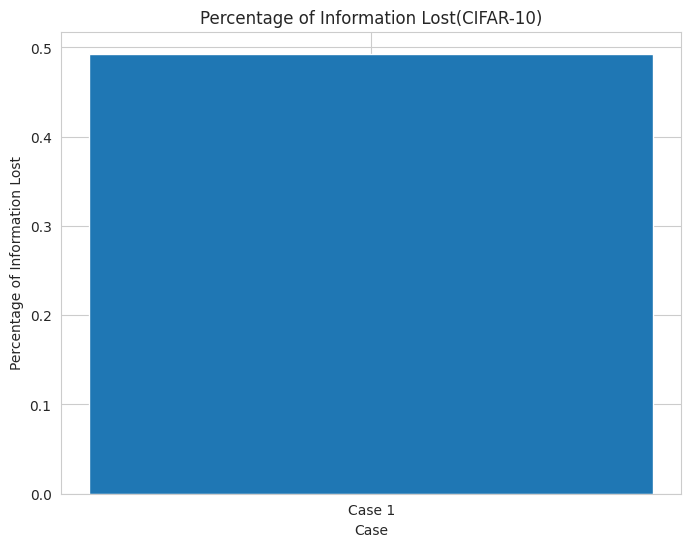

In [ ]:
explained_variance_ratio_cifar10_case3 = pca_cifar_4_com.explained_variance_ratio_

# Calculate percentage of information lost for Case 1
info_lost_percentage_cifar10_case3 = 1 - np.sum(explained_variance_ratio_cifar10_case3)

# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3','PCA 4'], explained_variance_ratio_cifar10_case3)
plt.title('Explained Variance Ratio(CIFAR-10)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_cifar10_case3)
plt.title('Percentage of Information Lost(CIFAR-10)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()


In [ ]:
print('Explained variation per principal component for CIFAR 4 components: {}'.format(explained_variance_ratio_cifar10_case3))

Explained variation per principal component for CIFAR 4 components: [0.2907663  0.11253144 0.06694414 0.03676459]


##### Case 4

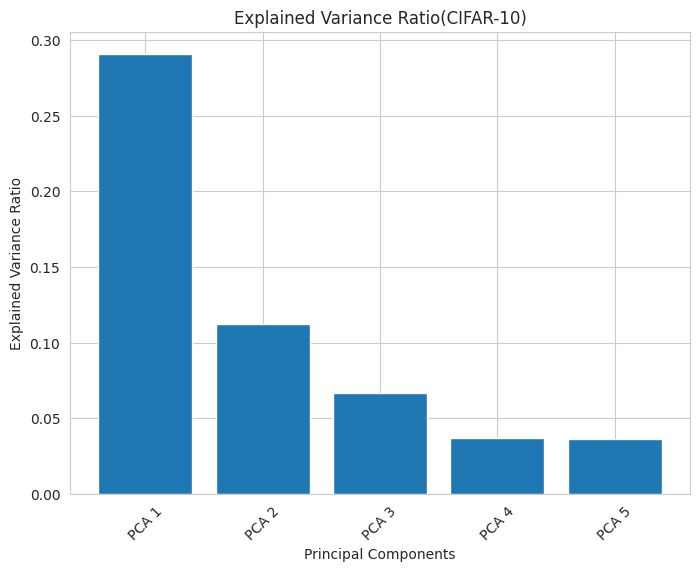

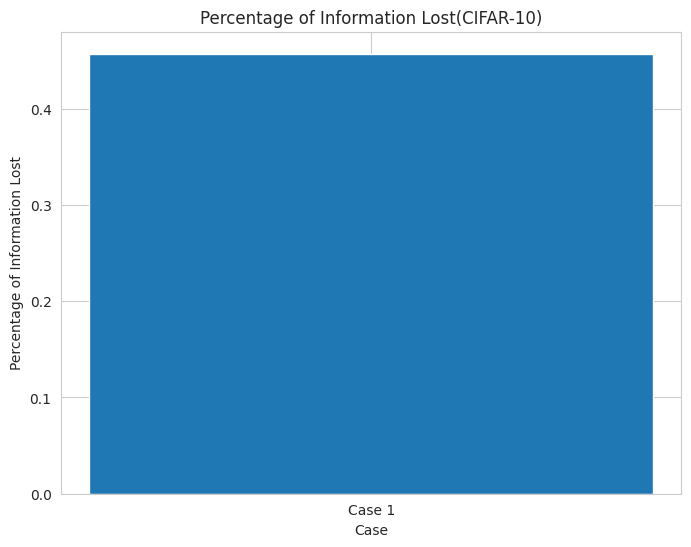

In [ ]:
explained_variance_ratio_cifar10_case4 = pca_cifar_5_com.explained_variance_ratio_

# Calculate percentage of information lost for Case 1
info_lost_percentage_cifar10_case4 = 1 - np.sum(explained_variance_ratio_cifar10_case4)


# Plot bar chart for explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(['PCA 1', 'PCA 2','PCA 3','PCA 4','PCA 5'], explained_variance_ratio_cifar10_case4)
plt.title('Explained Variance Ratio(CIFAR-10)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart for percentage of information lost
plt.figure(figsize=(8, 6))
plt.bar(['Case 1'], info_lost_percentage_cifar10_case4)
plt.title('Percentage of Information Lost(CIFAR-10)')
plt.xlabel('Case')
plt.ylabel('Percentage of Information Lost')
plt.show()


In [ ]:
print('Explained variation per principal component for CIFAR 5 components: {}'.format(explained_variance_ratio_cifar10_case4))

Explained variation per principal component for CIFAR 5 components: [0.2907663  0.11253144 0.06694414 0.03676459 0.03608843]


### Task 3

#### CIFAR10

##### Case 1: PCA will hold 90% of the variance

In [ ]:
cifar10_x_test_case_1 = cifar10_x_test/255.0
cifar10_x_test_case_1 = cifar10_x_test_case_1.reshape(-1,32,32,3)
cifar10_x_test_flat_case_1 = cifar10_x_test_case_1.reshape(-1,3072)

In [ ]:
# Assuming cifar10_x_train_flat and cifar10_x_test_flat_case_1 are defined and contain the flattened CIFAR-10 training and test data
# Also, assuming cifar10_y_train and cifar10_y_test are defined and contain the target labels

# PCA for train data
pca = PCA(0.9)
pca.fit(cifar10_x_train_flat)

train_img_pca = pca.transform(cifar10_x_train_flat)
test_img_pca = pca.transform(cifar10_x_test_flat_case_1)

# One-hot encode the target labels
from keras.utils import to_categorical
y_train_categorical = to_categorical(cifar10_y_train)
y_test_categorical = to_categorical(cifar10_y_test)


# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train_img_pca.shape[1],)))  # Use the shape of the PCA-transformed data
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


start_time = time.time()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_img_pca, y_train_categorical, batch_size=64, epochs=5, verbose=1, validation_data=(test_img_pca, y_test_categorical))

Epoch 1/5
782/782 [==============================] - 58s 73ms/step - loss: 1.6004 - accuracy: 0.4341 - val_loss: 1.4572 - val_accuracy: 0.4849
Epoch 2/5
782/782 [==============================] - 35s 45ms/step - loss: 1.3032 - accuracy: 0.5387 - val_loss: 1.3966 - val_accuracy: 0.5197
Epoch 3/5
782/782 [==============================] - 34s 43ms/step - loss: 1.1385 - accuracy: 0.5951 - val_loss: 1.3679 - val_accuracy: 0.5287
Epoch 4/5
782/782 [==============================] - 37s 48ms/step - loss: 0.9964 - accuracy: 0.6470 - val_loss: 1.3682 - val_accuracy: 0.5488
Epoch 5/5
782/782 [==============================] - 35s 44ms/step - loss: 0.8691 - accuracy: 0.6911 - val_loss: 1.4755 - val_accuracy: 0.5478


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"model training time: {training_time:.2f} mins")

model training time: 3.38 mins


##### Case 2: PCA will hold 80% of the variance

In [ ]:
cifar10_x_test_case_2 = cifar10_x_test/255.0
cifar10_x_test_case_2 = cifar10_x_test_case_2.reshape(-1,32,32,3)
cifar10_x_test_flat_case_2 = cifar10_x_test_case_2.reshape(-1,3072)

In [ ]:
# Assuming cifar10_x_train_flat and cifar10_x_test_flat_case_1 are defined and contain the flattened CIFAR-10 training and test data
# Also, assuming cifar10_y_train and cifar10_y_test are defined and contain the target labels

# PCA for train data
pca = PCA(0.8)
pca.fit(cifar10_x_train_flat)

train_img_pca = pca.transform(cifar10_x_train_flat)
test_img_pca = pca.transform(cifar10_x_test_flat_case_2)


# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train_img_pca.shape[1],)))  # Use the shape of the PCA-transformed data
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

start_time = time.time()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_img_pca, y_train_categorical, batch_size=64, epochs=5, verbose=1, validation_data=(test_img_pca, y_test_categorical))


Epoch 1/5
782/782 [==============================] - 36s 45ms/step - loss: 1.6454 - accuracy: 0.4168 - val_loss: 1.5654 - val_accuracy: 0.4657
Epoch 2/5
782/782 [==============================] - 34s 44ms/step - loss: 1.4226 - accuracy: 0.4965 - val_loss: 1.4756 - val_accuracy: 0.4798
Epoch 3/5
782/782 [==============================] - 36s 46ms/step - loss: 1.3196 - accuracy: 0.5334 - val_loss: 1.4430 - val_accuracy: 0.4985
Epoch 4/5
782/782 [==============================] - 36s 47ms/step - loss: 1.2440 - accuracy: 0.5561 - val_loss: 1.4391 - val_accuracy: 0.5117
Epoch 5/5
782/782 [==============================] - 35s 45ms/step - loss: 1.1674 - accuracy: 0.5833 - val_loss: 1.4984 - val_accuracy: 0.5116


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"model training time: {training_time:.2f} mins")

model training time: 2.96 mins


##### Case 3: PCA will hold 70% of the variance

In [ ]:
cifar10_x_test_case_3 = cifar10_x_test/255.0
cifar10_x_test_case_3 = cifar10_x_test_case_3.reshape(-1,32,32,3)
cifar10_x_test_flat_case_3 = cifar10_x_test_case_3.reshape(-1,3072)

In [ ]:
# Assuming cifar10_x_train_flat and cifar10_x_test_flat_case_1 are defined and contain the flattened CIFAR-10 training and test data
# Also, assuming cifar10_y_train and cifar10_y_test are defined and contain the target labels

# PCA for train data
pca = PCA(0.7)
pca.fit(cifar10_x_train_flat)

train_img_pca = pca.transform(cifar10_x_train_flat)
test_img_pca = pca.transform(cifar10_x_test_flat_case_2)


# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train_img_pca.shape[1],)))  # Use the shape of the PCA-transformed data
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

start_time = time.time()


# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_img_pca, y_train_categorical, batch_size=64, epochs=5, verbose=1, validation_data=(test_img_pca, y_test_categorical))

Epoch 1/5
782/782 [==============================] - 32s 40ms/step - loss: 1.7702 - accuracy: 0.3657 - val_loss: 1.7045 - val_accuracy: 0.3971
Epoch 2/5
782/782 [==============================] - 29s 38ms/step - loss: 1.6376 - accuracy: 0.4175 - val_loss: 1.6626 - val_accuracy: 0.4143
Epoch 3/5
782/782 [==============================] - 30s 38ms/step - loss: 1.5870 - accuracy: 0.4326 - val_loss: 1.6227 - val_accuracy: 0.4288
Epoch 4/5
782/782 [==============================] - 31s 39ms/step - loss: 1.5430 - accuracy: 0.4499 - val_loss: 1.6647 - val_accuracy: 0.4165
Epoch 5/5
782/782 [==============================] - 30s 38ms/step - loss: 1.5081 - accuracy: 0.4624 - val_loss: 1.6639 - val_accuracy: 0.4230


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"model training time: {training_time:.2f} mins")

model training time: 2.53 mins


##### Case 4: PCA will hold 60% of the variance

In [ ]:
cifar10_x_test_case_4  = cifar10_x_test/255.0
cifar10_x_test_case_4 = cifar10_x_test_case_4.reshape(-1,32,32,3)
cifar10_x_test_flat_case_4 = cifar10_x_test_case_4.reshape(-1,3072)

In [ ]:
# Assuming cifar10_x_train_flat and cifar10_x_test_flat_case_1 are defined and contain the flattened CIFAR-10 training and test data
# Also, assuming cifar10_y_train and cifar10_y_test are defined and contain the target labels

# PCA for train data
pca = PCA(0.6)
pca.fit(cifar10_x_train_flat)

train_img_pca = pca.transform(cifar10_x_train_flat)
test_img_pca = pca.transform(cifar10_x_test_flat_case_4)

# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train_img_pca.shape[1],)))  # Use the shape of the PCA-transformed data
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


start_time = time.time()

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_img_pca, y_train_categorical, batch_size=64, epochs=5, verbose=1, validation_data=(test_img_pca, y_test_categorical))


Epoch 1/5
782/782 [==============================] - 34s 42ms/step - loss: 1.8907 - accuracy: 0.3184 - val_loss: 1.8647 - val_accuracy: 0.3344
Epoch 2/5
782/782 [==============================] - 30s 39ms/step - loss: 1.8177 - accuracy: 0.3447 - val_loss: 1.8311 - val_accuracy: 0.3371
Epoch 3/5
782/782 [==============================] - 31s 39ms/step - loss: 1.7932 - accuracy: 0.3533 - val_loss: 1.8173 - val_accuracy: 0.3463
Epoch 4/5
782/782 [==============================] - 30s 38ms/step - loss: 1.7775 - accuracy: 0.3606 - val_loss: 1.8343 - val_accuracy: 0.3443
Epoch 5/5
782/782 [==============================] - 30s 38ms/step - loss: 1.7637 - accuracy: 0.3655 - val_loss: 1.8056 - val_accuracy: 0.3506


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"model training time: {training_time:.2f} mins")

model training time: 2.57 mins


##### Case 5: PCA will hold 50% of the variance


In [ ]:
cifar10_x_test_case_5 = cifar10_x_test/255.0
cifar10_x_test_case_5 = cifar10_x_test_case_5.reshape(-1,32,32,3)
cifar10_x_test_flat_case_5 = cifar10_x_test_case_5.reshape(-1,3072)

In [ ]:
# Assuming cifar10_x_train_flat and cifar10_x_test_flat_case_1 are defined and contain the flattened CIFAR-10 training and test data
# Also, assuming cifar10_y_train and cifar10_y_test are defined and contain the target labels

# PCA for train data
pca = PCA(0.5)
pca.fit(cifar10_x_train_flat)

train_img_pca = pca.transform(cifar10_x_train_flat)
test_img_pca = pca.transform(cifar10_x_test_flat_case_5)

# Define the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(train_img_pca.shape[1],)))  # Use the shape of the PCA-transformed data
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

start_time = time.time()
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
history = model.fit(train_img_pca, y_train_categorical, batch_size=64, epochs=5, verbose=1, validation_data=(test_img_pca, y_test_categorical))

Epoch 1/5
782/782 [==============================] - 31s 38ms/step - loss: 2.0606 - accuracy: 0.2505 - val_loss: 2.0450 - val_accuracy: 0.2649
Epoch 2/5
782/782 [==============================] - 32s 40ms/step - loss: 2.0263 - accuracy: 0.2689 - val_loss: 2.0265 - val_accuracy: 0.2733
Epoch 3/5
782/782 [==============================] - 30s 38ms/step - loss: 2.0171 - accuracy: 0.2713 - val_loss: 2.0194 - val_accuracy: 0.2802
Epoch 4/5
782/782 [==============================] - 30s 38ms/step - loss: 2.0117 - accuracy: 0.2722 - val_loss: 2.0170 - val_accuracy: 0.2794
Epoch 5/5
782/782 [==============================] - 31s 39ms/step - loss: 2.0071 - accuracy: 0.2768 - val_loss: 2.0103 - val_accuracy: 0.2819


In [ ]:
# Calcuate the time to get how many minutes takes to train the model without using PCA           #scsc
training_time = (time.time() - start_time)/60
print(f"model training time: {training_time:.2f} mins")

model training time: 2.55 mins
